<a href="https://colab.research.google.com/github/1864691/acml-assignment-2/blob/assignment_2/Assignment_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing # used for feature scaling, standardisation, and regularization
from sklearn.model_selection import train_test_split

# Importing the dataset
# this dataset is a representation of happiness by country 
#explained by various features including GDP per capita, social support, health life expectancy and various others. 
dataset = pd.read_csv('World Happiness Report 2022.csv')
dataset

FileNotFoundError: ignored

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn import preprocessing # used for feature scaling, standardisation, and regularization

def relu(z):
    a = np.maximum(0,z)
    return a

def initialize_params(layer_sizes):
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

def forward_propagation(X_train, params):
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)])
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers:
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

def compute_cost(values, Y_train):
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

def backward_propagation(params, values, X_train, Y_train):
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

def update_params(params, grads, learning_rate):
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

def model(X_train, Y_train, layer_sizes, num_iters, learning_rate):
    params = initialize_params(layer_sizes)
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params

def compute_accuracy(X_train, X_test, Y_train, Y_test, params):
    values_train = forward_propagation(X_train.T, params)
    values_test = forward_propagation(X_test.T, params)
    train_acc = np.sqrt(mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T))
    test_acc = np.sqrt(mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T))
    return train_acc, test_acc

def predict(X, params):
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

#data = load_boston()   
data = np.read_csv('World Happiness Report 2022.csv')                             #load dataset
X = dataset[['Explained by: GDP per capita','Explained by: Social support' ,'Explained by: Healthy life expectancy' ]] #separate data into input and output features
y = dataset[['Happiness score']]                                                  
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)           #split data into train and test sets in 80-20 ratio
layer_sizes = [13, 5, 5, 1]                                                       #set layer sizes, do not change the size of the first and last layer 
num_iters = 1000                                                                  #set number of iterations over the training set(also known as epochs in batch gradient descent context)
learning_rate = 0.03                                                              #set learning rate for gradient descent
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params)  #get training and test accuracy
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

AttributeError: ignored

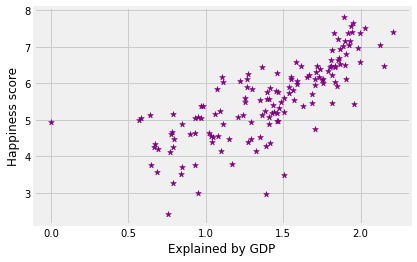

In [ ]:
# plot the data
# the data plotted here is the happiness scale explained by GDP per capita 

X1 = dataset.iloc[:, 6].values #get a copy of dataset GDP per capita
Y = dataset.iloc[:, 2].values #get array of dataset in column happiness score
plt.scatter(X1, Y, color = 'purple', marker = '*')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

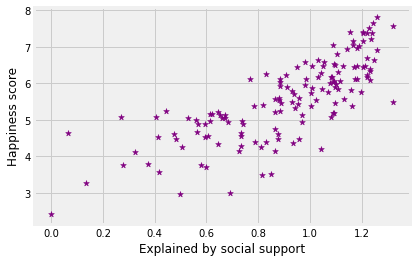

In [ ]:
# plot the data
# the data plotted here is the happiness scale explained by social support 

X2 = dataset.iloc[:, 7].values #get a copy of dataset social support
Y = dataset.iloc[:, 2].values #get array of dataset in column happiness score
plt.scatter(X2, Y, color = 'purple', marker = '*')
plt.xlabel("Explained by social support")
plt.ylabel("Happiness score")
plt.show()

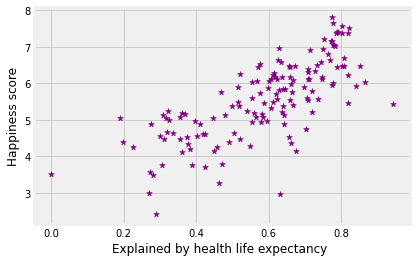

In [ ]:
# plot the data
# the data plotted here is the happiness scale explained by health life expectancy 

X3 = dataset.iloc[:, 8].values #get a copy of dataset health life expectancy 
Y = dataset.iloc[:, 2].values #get array of dataset in column happiness score
plt.scatter(X3, Y, color = 'purple', marker = '*')
plt.xlabel("Explained by health life expectancy ")
plt.ylabel("Happiness score")
plt.show()

In [ ]:
#the above three plots with respect to various features can be observed 
#to be all of a similar shape and thus should all fit into a similar or the same regression plot

In [ ]:
# Here we define x and y data to be split
X = dataset[['Explained by: GDP per capita','Explained by: Social support' ,'Explained by: Healthy life expectancy' ]]
y = dataset[['Happiness score']]

In [ ]:
# we now split the data into training and testing datasets 
# the advantage of spliting the data is to ensure accuracy as the training data is previously seen 
# it is consistent/ predicatable thus we have the testing data that is unseen to ensure the model
#fits both sets and will work on datasets that are new and unseen


In [ ]:
# splitting the data into training data and testing data 
# training data split into 70% 
# testing data split into 30%

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
len(X_train) #70% of the data 

102

In [ ]:
len(X_test) #30% of the data 

44

In [ ]:
X_train #visualization of random sample data taken to be trained (same occurs for testing)

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy
30,1.834,1.052,0.801
83,0.984,0.784,0.499
59,1.268,0.912,0.514
2,1.936,1.320,0.803
124,1.274,0.786,0.197
...,...,...,...
87,1.094,0.442,0.322
39,1.668,1.220,0.611
58,1.851,0.886,0.841
140,0.839,0.848,0.000


In [ ]:
# here x_train_1 is defined in order to use as a single feature GDP per capita 
X_train_1 = X_train[["Explained by: GDP per capita"]]
X_train_1

,Explained by: GDP per capita
30,1.834
83,0.984
59,1.268
2,1.936
124,1.274
...,...
87,1.094
39,1.668
58,1.851
140,0.839


In [ ]:
X_test_1 = X_test[["Explained by: GDP per capita"]]
X_test_1

,Explained by: GDP per capita
26,2.149
90,1.425
67,1.393
111,1.707
24,1.870
7,1.997
44,1.105
106,1.289
56,1.592
118,1.032


In [ ]:
y_train

,Happiness score
30,6.467
83,5.377
59,5.904
2,7.557
124,4.396
...,...
87,5.235
39,6.234
58,5.935
140,3.512


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn import preprocessing # used for feature scaling, standardisation, and regularization

def relu(z):
    a = np.maximum(0,z)
    return a

def initialize_params(layer_sizes):
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

def forward_propagation(X_train, params):
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)])
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers:
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

def compute_cost(values, Y_train):
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

def backward_propagation(params, values, X_train, Y_train):
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

def update_params(params, grads, learning_rate):
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

def model(X_train, Y_train, layer_sizes, num_iters, learning_rate):
    params = initialize_params(layer_sizes)
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params

def compute_accuracy(X_train, X_test, Y_train, Y_test, params):
    values_train = forward_propagation(X_train.T, params)
    values_test = forward_propagation(X_test.T, params)
    train_acc = np.sqrt(mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T))
    test_acc = np.sqrt(mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T))
    return train_acc, test_acc

def predict(X, params):
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

#data = load_boston()   
data = np.read_csv('World Happiness Report 2022.csv')                             #load dataset
X = dataset[['Explained by: GDP per capita','Explained by: Social support' ,'Explained by: Healthy life expectancy' ]] #separate data into input and output features
y = dataset[['Happiness score']]                                                  
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)           #split data into train and test sets in 80-20 ratio
layer_sizes = [13, 5, 5, 1]                                                       #set layer sizes, do not change the size of the first and last layer 
num_iters = 1000                                                                  #set number of iterations over the training set(also known as epochs in batch gradient descent context)
learning_rate = 0.03                                                              #set learning rate for gradient descent
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params)  #get training and test accuracy
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

AttributeError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

In [ ]:
clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
# accuracy 
clf.score(X_test, y_test)

0.5677760700716632

In [ ]:
def estimate_coef(x, y):

    n = len(x)

    # mean of x and y 
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x ( ss->sum of squares)
    ss_xy = np.sum(y*x) - n*m_y*m_x
    ss_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = ss_xy / ss_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

In [ ]:

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m", marker = "o", s = 30)

    # predicted response 
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "red")

    # putting labels
    plt.ylabel('Happines Score')
    plt.xlabel('Explained by: GDP per capita')

    # function to show plot
    plt.show()


Estimated coefficients:
b_0 = 2.3728764053131406 
b_1 = 2.232133628102828


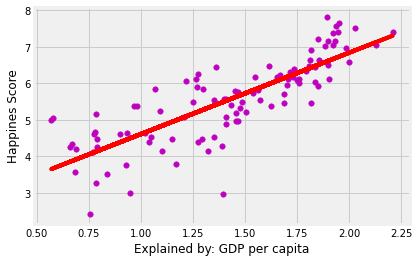

In [ ]:
# plotting the linear regression 
x = X_train_1.values
y = y_train.values

b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {} \
\nb_1 = {}".format(b[0], b[1]))

plot_regression_line(x, y, b)



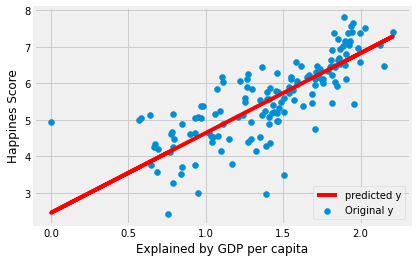

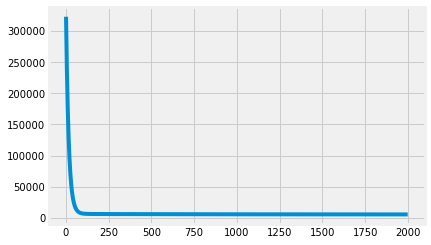

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X1, Y, label = 'Original y')
plt.plot(X1, y_predict, label = 'predicted y', color="red")
plt.legend(loc = "lower right")
plt.xlabel("Explained by GDP per capita")
plt.ylabel("Happines Score")
plt.show()
plt.figure()
plt.plot(range(0, len(cost)), cost)
plt.show()

In [ ]:
# checking my model using sklearn
x = X_train_1.values
y = y_train.values
reg = LinearRegression()
reg.fit(x, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 2.3729 + 2.2321X


In [ ]:
# the folowing few codes describe what happens when we update L ( the learning rate)
# we see how updating the learning rate effects convergence

Theta_0: [0.10760036] 
Theta_1: [0.16061325] 
Learning rate: 1e-05


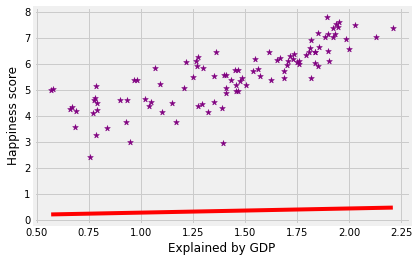

In [ ]:
# Building the model
# this is a linear regression model by first priciples 
#as can be seen by updating the learning rate we can see how the model converges

Theta_0 = 0
Theta_1 = 0

L = 0.00001  # The learning Rate (alpha) 
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train_1)) # Number of elements in X

X_T = X_train_1.values
Y_T = y_train.values
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = Theta_0 + Theta_1*X_T # The current predicted value of Y
    
    theta0 = (-2/n) * sum(Y_T - Y_pred)  
    theta1 = (-2/n) * sum(X_T * (Y_T - Y_pred))

    Theta_0 = Theta_0 - L * theta0 
    Theta_1  = Theta_1 - L * theta1 
    
print ("Theta_0:", Theta_0, "\nTheta_1:", Theta_1, "\nLearning rate:", L)
plt.scatter(X_T, Y_T, color = 'purple', marker = '*')
plt.plot([min(X_T), max(X_T)], [min(Y_pred), max(Y_pred)], color='red')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

Theta_0: [0.82583399] 
Theta_1: [1.22933448] 
Learning rate: 0.0001


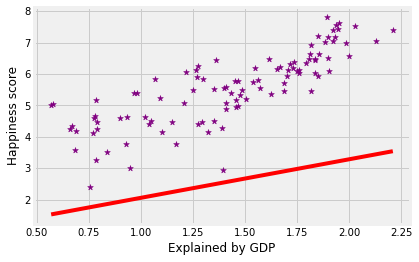

In [ ]:
# Building the model
# this is a linear regression model by first priciples 
#as can be seen by updating the learning rate we can see how the model converges

Theta_0 = 0
Theta_1 = 0

L = 0.0001  # The learning Rate (alpha) 
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train_1)) # Number of elements in X

X_T = X_train_1.values
Y_T = y_train.values
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = Theta_0 + Theta_1*X_T # The current predicted value of Y
    
    theta0 = (-2/n) * sum(Y_T - Y_pred)  
    theta1 = (-2/n) * sum(X_T * (Y_T - Y_pred))

    Theta_0 = Theta_0 - L * theta0 
    Theta_1  = Theta_1 - L * theta1 
    
print ("Theta_0:", Theta_0, "\nTheta_1:", Theta_1, "\nLearning rate:", L)
plt.scatter(X_T, Y_T, color = 'purple', marker = '*')
plt.plot([min(X_T), max(X_T)], [min(Y_pred), max(Y_pred)], color='red')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

Theta_0: [1.81580666] 
Theta_1: [2.59498396] 
Learning rate: 0.001


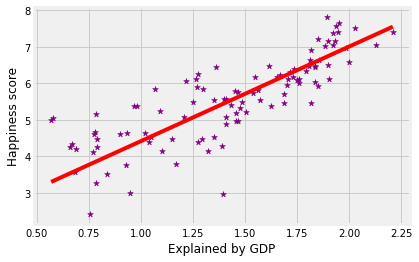

In [ ]:
# Building the model
# this is a linear regression model by first priciples 
#as can be seen by updating the learning rate we can see how the model converges

Theta_0 = 0
Theta_1 = 0

L = 0.001  # The learning Rate (alpha) 
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train_1)) # Number of elements in X

X_T = X_train_1.values
Y_T = y_train.values
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = Theta_0 + Theta_1*X_T # The current predicted value of Y
    
    theta0 = (-2/n) * sum(Y_T - Y_pred)  
    theta1 = (-2/n) * sum(X_T * (Y_T - Y_pred))

    Theta_0 = Theta_0 - L * theta0 
    Theta_1  = Theta_1 - L * theta1 
    
print ("Theta_0:", Theta_0, "\nTheta_1:", Theta_1, "\nLearning rate:", L)
plt.scatter(X_T, Y_T, color = 'purple', marker = '*')
plt.plot([min(X_T), max(X_T)], [min(Y_pred), max(Y_pred)], color='red')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

Theta_0: [2.16813223] 
Theta_1: [2.36804411] 
Learning rate: 0.01


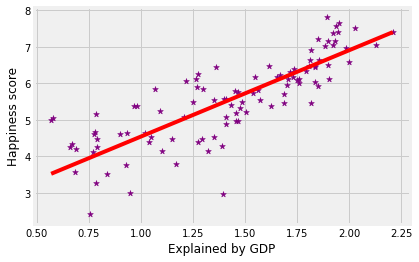

In [ ]:
# Building the model
# this is a linear regression model by first priciples 
#as can be seen by updating the learning rate we can see how the model converges

Theta_0 = 0
Theta_1 = 0

L = 0.01  # The learning Rate (alpha) 
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train_1)) # Number of elements in X

X_T = X_train_1.values
Y_T = y_train.values
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = Theta_0 + Theta_1*X_T # The current predicted value of Y
    
    theta0 = (-2/n) * sum(Y_T - Y_pred)  
    theta1 = (-2/n) * sum(X_T * (Y_T - Y_pred))

    Theta_0 = Theta_0 - L * theta0 
    Theta_1  = Theta_1 - L * theta1 
    
print ("Theta_0:", Theta_0, "\nTheta_1:", Theta_1, "\nLearning rate:", L)
plt.scatter(X_T, Y_T, color = 'purple', marker = '*')
plt.plot([min(X_T), max(X_T)], [min(Y_pred), max(Y_pred)], color='red')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

Theta_0: [2.37286717] 
Theta_1: [2.23213976] 
Learning rate: 0.1


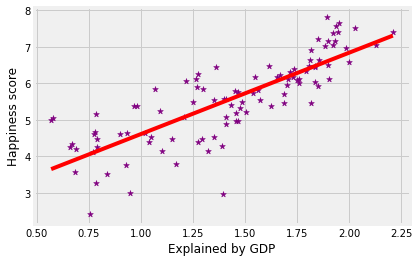

In [ ]:
# Building the model
# this is a linear regression model by first priciples 
#as can be seen by updating the learning rate we can see how the model converges

Theta_0 = 0
Theta_1 = 0

L = 0.1  # The learning Rate (alpha) 
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train_1)) # Number of elements in X

X_T = X_train_1.values
Y_T = y_train.values
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = Theta_0 + Theta_1*X_T # The current predicted value of Y
    
    theta0 = (-2/n) * sum(Y_T - Y_pred)  
    theta1 = (-2/n) * sum(X_T * (Y_T - Y_pred))

    Theta_0 = Theta_0 - L * theta0 
    Theta_1  = Theta_1 - L * theta1 
    
print ("Theta_0:", Theta_0, "\nTheta_1:", Theta_1, "\nLearning rate:", L)
plt.scatter(X_T, Y_T, color = 'purple', marker = '*')
plt.plot([min(X_T), max(X_T)], [min(Y_pred), max(Y_pred)], color='red')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

In [ ]:
# from the above we see that choosing L(alpha- learning rate) to be 0.1 is the best fit 

In [ ]:
#improving the model (feature scaling, feature standardization, regularisation)
# improving the model by using these techniques helps the gradient decent converge much faster 

In [ ]:
# Performing feature scaling 

dataset.head()
x = dataset[["Happiness score",
             "Explained by: GDP per capita", 
             "Explained by: Social support", 
             "Explained by: Healthy life expectancy"]]
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(X_train)
print ("\n ORIGIONAL VALUES: \n\n", X_train) 


 ORIGIONAL VALUES: 

      Explained by: GDP per capita  Explained by: Social support  \
30                          1.834                         1.052   
83                          0.984                         0.784   
59                          1.268                         0.912   
2                           1.936                         1.320   
124                         1.274                         0.786   
..                            ...                           ...   
87                          1.094                         0.442   
39                          1.668                         1.220   
58                          1.851                         0.886   
140                         0.839                         0.848   
88                          1.505                         0.863   

     Explained by: Healthy life expectancy  
30                                   0.801  
83                                   0.499  
59                                   

In [ ]:
# feature scaling implementation 
#min-max scalar

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
scaled_x= min_max_scaler.fit_transform(X_train) 
print ("\n VALUES AFTER MIN MAX SCALING: \n\n", scaled_x) 


 VALUES AFTER MIN MAX SCALING: 

 [[0.77120195 0.7969697  0.92494226]
 [0.25259304 0.59393939 0.57621247]
 [0.42586943 0.69090909 0.59353349]
 [0.83343502 1.         0.92725173]
 [0.4295302  0.59545455 0.22748268]
 [0.65954851 0.81818182 0.86374134]
 [0.00488103 0.5        0.22055427]
 [0.83038438 0.88257576 0.89376443]
 [0.54789506 0.80909091 0.76789838]
 [0.49908481 0.55454545 0.63279446]
 [0.75655888 0.94621212 0.88799076]
 [0.13117755 0.10075758 0.5334873 ]
 [0.44295302 0.79166667 0.74595843]
 [0.50457596 0.65530303 0.84872979]
 [0.50152532 0.37727273 0.72863741]
 [0.30445394 0.84015152 0.73672055]
 [0.07077486 0.31515152 0.31524249]
 [0.13300793 0.61287879 0.52771363]
 [0.21964613 0.43712121 0.35334873]
 [0.44051251 0.66439394 0.40877598]
 [0.27394753 0.55454545 0.58314088]
 [0.71873093 0.93409091 0.77136259]
 [0.13117755 0.47045455 0.426097  ]
 [0.6052471  0.87651515 0.72632794]
 [0.51311775 0.81893939 0.67321016]
 [0.0738255  0.79015152 0.44341801]
 [0.68273337 0.71060606 0.715

Theta_0: 2.3728764053131406 
Theta_1: 2.232133628102828 
Learning rate: 0.1


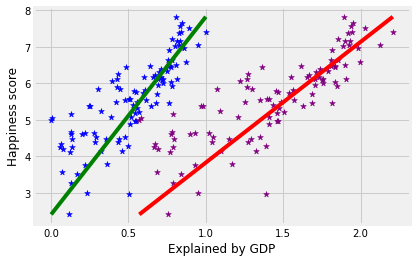

In [ ]:
# comparison between scaled and unscaled plots 
plot_x = scaled_x[:,0] # by GDP
plot_y = y_train.values #happiness

# plot after scaling
plt.scatter(plot_x, plot_y, color='blue', marker='*')  
plt.plot([min(plot_x), max(plot_x)], [min(plot_y), max(plot_y)], color='green') #plotting the regression line 

print ("Theta_0:", b[0], "\nTheta_1:", b[1], "\nLearning rate:", L)

plt.scatter(X_train_1, y_train, color = 'purple', marker = '*')
plt.plot([min(X_train_1.values), max(X_train_1.values)], [min(plot_y), max(plot_y)], color = "red")#plotting the regression line 
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

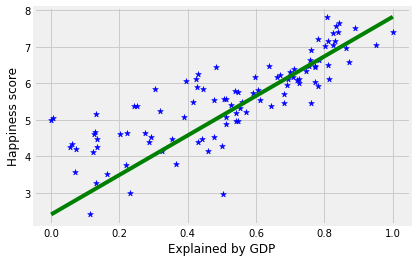

In [ ]:
#scaled plot 
plt.scatter(plot_x, plot_y, color='blue', marker='*') # plot after scaling 
plt.plot([min(plot_x), max(plot_x)], [min(plot_y), max(plot_y)], color='green')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

In [ ]:
# feature standardisation implementation 

Standardisation = preprocessing.StandardScaler() 
standardized_x= Standardisation.fit_transform(X_train) 
print ("\n\n VALUES AFTER STANDARDIZATION : \n\n", standardized_x) 



 VALUES AFTER STANDARDIZATION : 

 [[ 9.85548696e-01  4.75236401e-01  1.19274783e+00]
 [-1.05380957e+00 -4.33674412e-01 -5.02200924e-01]
 [-3.72423984e-01  4.32244680e-04 -4.18014728e-01]
 [ 1.23027169e+00  1.38414721e+00  1.20397266e+00]
 [-3.58028514e-01 -4.26891496e-01 -2.19714968e+00]
 [ 5.46486858e-01  5.70197232e-01  8.95289935e-01]
 [-2.02790305e+00 -8.54215236e-01 -2.23082416e+00]
 [ 1.21827546e+00  8.58471184e-01  1.04121268e+00]
 [ 1.07425020e-01  5.29499733e-01  4.29459649e-01]
 [-8.45145819e-02 -6.10030242e-01 -2.27192683e-01]
 [ 9.27966816e-01  1.14335368e+00  1.01315061e+00]
 [-1.53125933e+00 -2.64151374e+00 -7.09860209e-01]
 [-3.05245124e-01  4.51496193e-01  3.22823800e-01]
 [-6.29213767e-02 -1.58966293e-01  8.22328565e-01]
 [-7.49176018e-02 -1.40363147e+00  2.38637604e-01]
 [-8.49873743e-01  6.68549522e-01  2.77924495e-01]
 [-1.76878458e+00 -1.68173105e+00 -1.77060628e+00]
 [-1.52406159e+00 -3.48887956e-01 -7.37922274e-01]
 [-1.18336880e+00 -1.13570627e+00 -1.58539665

Theta_0: 2.3728764053131406 
Theta_1: 2.232133628102828 
Learning rate: 0.1


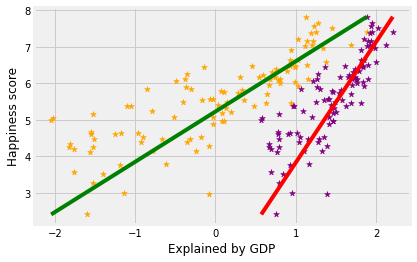

In [ ]:
# plot after feature standardisation compared with original plot

# comparison between scaled and unscaled plots 
plot_x = standardized_x[:,0] # by GDP
plot_y = y_train.values #happiness

# plot after scaling
plt.scatter(plot_x, plot_y, color='orange', marker='*')  
plt.plot([min(plot_x), max(plot_x)], [min(plot_y), max(plot_y)], color='green') #plotting the regression line 

print ("Theta_0:", b[0], "\nTheta_1:", b[1], "\nLearning rate:", L)

plt.scatter(X_train_1, y_train, color = 'purple', marker = '*')
plt.plot([min(X_train_1.values), max(X_train_1.values)], [min(plot_y), max(plot_y)], color = "red")#plotting the regression line 
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")
plt.show()

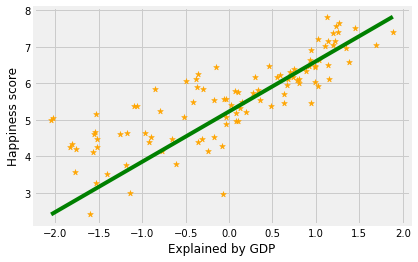

In [ ]:
# plot after feature standardisation

plot_y = y_train.values #happiness
plot_x = standardized_x[:,0] # by GDP

plt.scatter(plot_x, plot_y, color='orange', marker='*') # plot after standardisation 
plt.plot([min(plot_x), max(plot_x)], [min(plot_y), max(plot_y)], color='green')
plt.xlabel("Explained by GDP")
plt.ylabel("Happiness score")

plt.show()

In [ ]:
# regularization implementation
# the idea behind regularization is to automatically control the complexity of the learned hypothesis